In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('bigdata_sales_train.csv')

In [3]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [4]:
df.columns


Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [5]:
df.dtypes


Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [6]:
df['Item_Identifier'].value_counts()    

FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64

In [7]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [8]:
df['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [9]:
df['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [10]:
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [11]:
df['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [12]:
df['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [13]:
df.isnull().sum()       #missing value present in Item weight column

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [14]:
df["Item_Weight"].unique()

array([ 9.3  ,  5.92 , 17.5  , 19.2  ,  8.93 , 10.395, 13.65 ,    nan,
       16.2  , 11.8  , 18.5  , 15.1  , 17.6  , 16.35 ,  9.   , 13.35 ,
       18.85 , 14.6  , 13.85 , 13.   ,  7.645, 11.65 ,  5.925, 19.25 ,
       18.6  , 18.7  , 17.85 , 10.   ,  8.85 ,  9.8  , 13.6  , 21.35 ,
       12.15 ,  6.42 , 19.6  , 15.85 ,  7.39 , 10.195,  9.895, 10.895,
        7.905,  9.195,  8.365,  7.97 , 17.7  , 19.35 ,  8.645, 15.6  ,
       18.25 ,  7.855,  7.825,  8.39 , 12.85 , 19.   ,  5.905,  7.76 ,
       16.75 , 15.5  ,  6.055,  6.305, 20.85 , 20.75 ,  8.895, 19.7  ,
        8.75 , 13.3  ,  8.31 , 19.75 , 17.1  , 10.5  ,  6.635, 14.15 ,
        8.89 ,  9.1  ,  7.5  , 16.85 ,  7.485, 11.6  , 12.65 , 20.25 ,
        8.6  , 12.6  ,  8.88 , 20.5  , 13.5  ,  7.235,  6.92 ,  8.02 ,
       12.8  , 16.6  , 14.   , 16.   , 21.25 ,  7.365, 18.35 ,  5.465,
        7.27 ,  6.155, 19.5  , 15.2  , 14.5  , 13.1  , 12.3  , 11.1  ,
       11.3  ,  5.75 , 11.35 ,  6.525, 10.3  ,  5.78 , 11.85 , 18.75 ,
      

In [15]:
np.mean(df['Item_Weight'])  

12.857645184136183

In [16]:
df["Item_Weight"]=df["Item_Weight"].fillna(np.mean(df["Item_Weight"]))

In [17]:
from scipy import stats as st    #replacing nan value in embarked column by taking the mode since its a object data type
arr=df["Outlet_Size"]
print(st.mode(arr))

ModeResult(mode=array(['Medium'], dtype=object), count=array([2793]))


In [18]:
df['Outlet_Size']=df["Outlet_Size"].fillna('Medium')

In [20]:
df.isnull().sum()    #no null values

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

Label Encoding

In [21]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Item_Identifier']=le.fit_transform(df['Item_Identifier'])
df['Outlet_Size']=le.fit_transform(df['Outlet_Size'])
df['Outlet_Location_Type']=le.fit_transform(df['Outlet_Location_Type'])
df['Outlet_Type']=le.fit_transform(df['Outlet_Type'])
df['Outlet_Identifier']=le.fit_transform(df['Outlet_Identifier'])
df['Item_Type']=le.fit_transform(df['Item_Type'])
df['Item_Fat_Content']=le.fit_transform(df['Item_Fat_Content'])

In [22]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.300,1,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.920,2,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.500,1,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.200,2,0.000000,6,182.0950,0,1998,1,2,0,732.3800
4,1297,8.930,1,0.000000,9,53.8614,1,1987,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,1,0.056783,13,214.5218,1,1987,0,2,1,2778.3834
8519,897,8.380,2,0.046982,0,108.1570,7,2002,1,1,1,549.2850
8520,1357,10.600,1,0.035186,8,85.1224,6,2004,2,1,1,1193.1136
8521,681,7.210,2,0.145221,13,103.1332,3,2009,1,2,2,1845.5976


In [23]:
df.corr()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Identifier,1.000000,0.044518,-0.098114,-0.025482,-0.017973,0.012853,-0.008602,-0.012772,0.001389,0.003656,-0.001178,0.002869
Item_Weight,0.044518,1.000000,-0.017331,-0.012049,0.028015,0.024756,-0.007975,-0.008301,-0.007225,0.004088,-0.000566,0.011550
Item_Fat_Content,-0.098114,-0.017331,1.000000,0.034042,-0.115958,-0.000876,-0.002357,-0.000189,-0.012058,-0.004102,-0.004214,0.009800
Item_Visibility,-0.025482,-0.012049,0.034042,1.000000,-0.035249,-0.001315,-0.100439,-0.074834,0.069309,-0.028099,-0.173468,-0.128625
Item_Type,-0.017973,0.028015,-0.115958,-0.035249,1.000000,0.032651,0.001656,0.004970,-0.001859,0.003084,0.003053,0.017048
Item_MRP,0.012853,0.024756,-0.000876,-0.001315,0.032651,1.000000,0.003319,0.005020,0.006059,0.000232,-0.001975,0.567574
Outlet_Identifier,-0.008602,-0.007975,-0.002357,-0.100439,0.001656,0.003319,1.000000,0.079035,0.504603,-0.716176,0.099873,0.162325
Outlet_Establishment_Year,-0.012772,-0.008301,-0.000189,-0.074834,0.004970,0.005020,0.079035,1.000000,0.193389,-0.089216,-0.122304,-0.049135
Outlet_Size,0.001389,-0.007225,-0.012058,0.069309,-0.001859,0.006059,0.504603,0.193389,1.000000,-0.614311,-0.201483,-0.086182
Outlet_Location_Type,0.003656,0.004088,-0.004102,-0.028099,0.003084,0.000232,-0.716176,-0.089216,-0.614311,1.000000,0.467219,0.089367


<AxesSubplot:xlabel='Item_MRP', ylabel='Item_Outlet_Sales'>

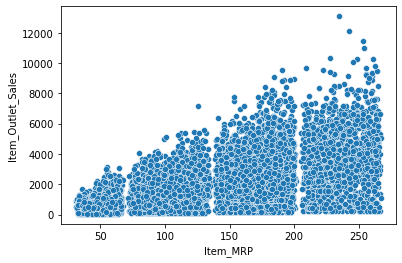

In [24]:
sns.scatterplot(x='Item_MRP',y='Item_Outlet_Sales',data=df)  #as the product mrp increases there is increase in sales

<AxesSubplot:xlabel='Item_Identifier', ylabel='Item_Outlet_Sales'>

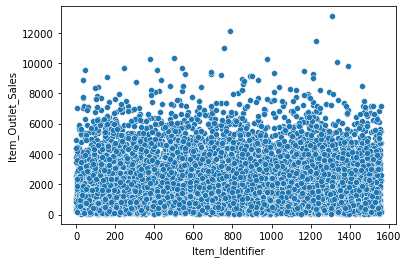

In [25]:
sns.scatterplot(x='Item_Identifier',y='Item_Outlet_Sales',data=df)

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='Item_Outlet_Sales'>

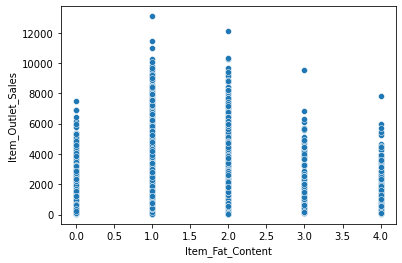

In [26]:
sns.scatterplot(x='Item_Fat_Content',y='Item_Outlet_Sales',data=df)

<AxesSubplot:xlabel='Outlet_Size', ylabel='Item_Outlet_Sales'>

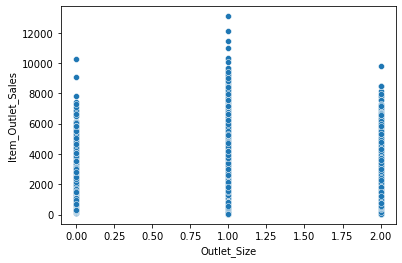

In [27]:
sns.scatterplot(x='Outlet_Size',y='Item_Outlet_Sales',data=df)

<AxesSubplot:xlabel='Item_Weight', ylabel='Item_Outlet_Sales'>

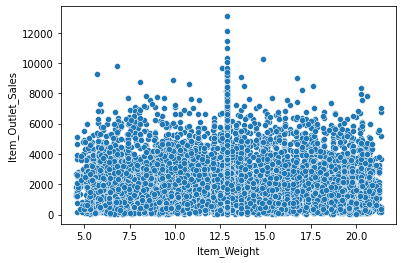

In [28]:
sns.scatterplot(x='Item_Weight',y='Item_Outlet_Sales',data=df)

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='Item_Outlet_Sales'>

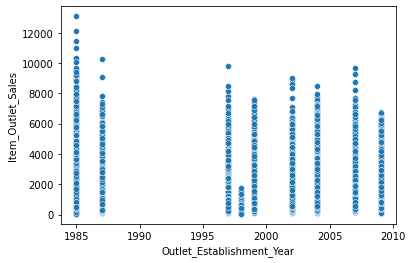

In [29]:
sns.scatterplot(x='Outlet_Establishment_Year',y='Item_Outlet_Sales',data=df)

<AxesSubplot:xlabel='Item_Type', ylabel='Item_Outlet_Sales'>

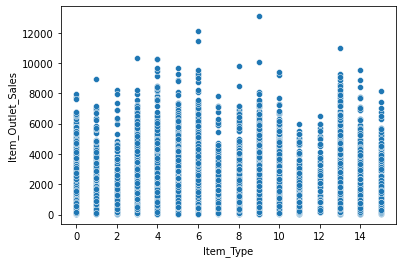

In [30]:
sns.scatterplot(x='Item_Type',y='Item_Outlet_Sales',data=df)

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='Item_Outlet_Sales'>

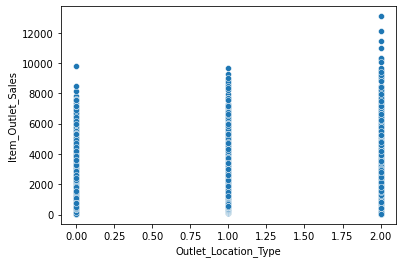

In [31]:
sns.scatterplot(x='Outlet_Location_Type',y='Item_Outlet_Sales',data=df)

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='Item_Outlet_Sales'>

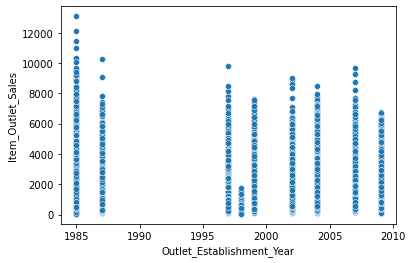

In [32]:
sns.scatterplot(x='Outlet_Establishment_Year',y='Item_Outlet_Sales',data=df)

<AxesSubplot:xlabel='Outlet_Type', ylabel='Item_Outlet_Sales'>

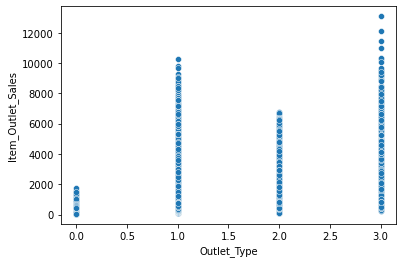

In [33]:
sns.scatterplot(x='Outlet_Type',y='Item_Outlet_Sales',data=df)

In [34]:
df.corr()['Item_Outlet_Sales'].sort_values()   # Looking at the correlation of the columns with the output we can remove few columns
                                               #setting correlation +/-0.1

Item_Visibility             -0.128625
Outlet_Size                 -0.086182
Outlet_Establishment_Year   -0.049135
Item_Identifier              0.002869
Item_Fat_Content             0.009800
Item_Weight                  0.011550
Item_Type                    0.017048
Outlet_Location_Type         0.089367
Outlet_Identifier            0.162325
Outlet_Type                  0.401522
Item_MRP                     0.567574
Item_Outlet_Sales            1.000000
Name: Item_Outlet_Sales, dtype: float64

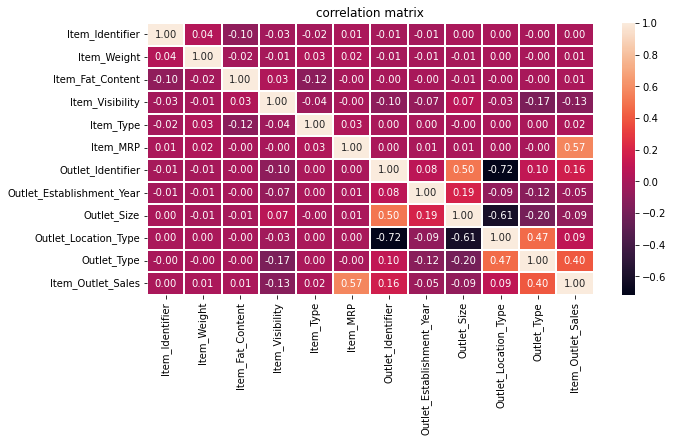

In [35]:
plt.figure(figsize=[10,5])
sns.heatmap(df.corr(),annot=True,fmt='.2f',linewidths=2)
plt.title('correlation matrix')
plt.show()

In [36]:
df=df.drop(['Item_Identifier','Item_Weight','Item_Fat_Content','Item_Type','Outlet_Establishment_Year'],axis=1)    #dropping the rows which have nothing to do with sales

In [37]:
df

,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,0.016047,249.8092,9,1,0,1,3735.1380
1,0.019278,48.2692,3,1,2,2,443.4228
2,0.016760,141.6180,9,1,0,1,2097.2700
3,0.000000,182.0950,0,1,2,0,732.3800
4,0.000000,53.8614,1,0,2,1,994.7052
...,...,...,...,...,...,...,...
8518,0.056783,214.5218,1,0,2,1,2778.3834
8519,0.046982,108.1570,7,1,1,1,549.2850
8520,0.035186,85.1224,6,2,1,1,1193.1136
8521,0.145221,103.1332,3,1,2,2,1845.5976


In [38]:
df.skew()    #since its most of the are categorical data  high skewness is not present in the data

Item_Visibility         1.167091
Item_MRP                0.127202
Outlet_Identifier      -0.059861
Outlet_Size            -0.087072
Outlet_Location_Type   -0.209093
Outlet_Type             0.927438
Item_Outlet_Sales       1.177531
dtype: float64

<AxesSubplot:xlabel='Item_MRP', ylabel='Density'>

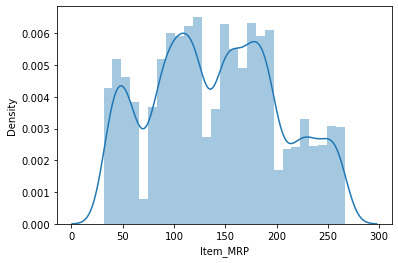

In [39]:
 sns.distplot(df['Item_MRP'])          #skewness plot

<AxesSubplot:xlabel='Outlet_Size', ylabel='Density'>

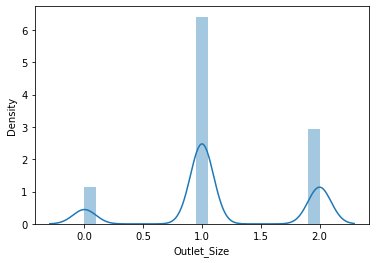

In [40]:
 sns.distplot(df['Outlet_Size'])   

Checking outliers

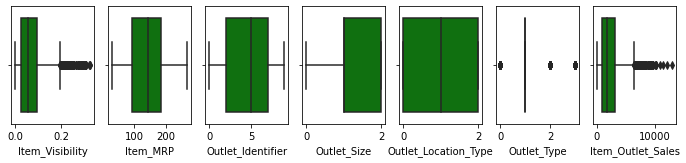

In [41]:
collist=df.columns.values
nrows=50
ncols=37
plt.figure(figsize=(nrows,3*ncols))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncols,i+1)
    sns.boxplot(df[collist[i]],orient='h',color='green')
    plt.tight_layout()

Outliers are present in few columns and since majority is categorical data outliers will not be present

In [42]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z.shape

(8523, 7)

In [43]:
threshold=3
print(np.where(z>3))

(array([  49,   83,  108,  130,  145,  174,  276,  304,  333,  373,  434,
        456,  472,  502,  521,  532,  661,  694,  753,  809,  854,  935,
        991,  997, 1009, 1138, 1159, 1254, 1272, 1291, 1311, 1324, 1434,
       1450, 1496, 1501, 1506, 1560, 1575, 1644, 1651, 1805, 1827, 1841,
       1859, 1998, 2088, 2109, 2122, 2216, 2238, 2251, 2293, 2324, 2439,
       2445, 2516, 2535, 2586, 2613, 2728, 2776, 2855, 2895, 3017, 3083,
       3087, 3098, 3154, 3206, 3234, 3286, 3399, 3407, 3458, 3474, 3488,
       3497, 3540, 3667, 3709, 3720, 3750, 3757, 3767, 3884, 3993, 4006,
       4219, 4289, 4346, 4349, 4382, 4408, 4530, 4656, 4674, 4676, 4681,
       4772, 4789, 4888, 4941, 4961, 4991, 5031, 5065, 5150, 5177, 5185,
       5223, 5287, 5315, 5374, 5500, 5550, 5619, 5732, 5734, 5752, 5795,
       5799, 5812, 5837, 5880, 5891, 5946, 5977, 6000, 6008, 6012, 6134,
       6179, 6334, 6409, 6536, 6537, 6541, 6576, 6606, 6622, 6674, 6786,
       6886, 6903, 6993, 7005, 7016, 7076, 7088, 7

In [44]:
len(np.where(z>3)[0])

185

In [45]:
df_new=df[(z<3).all(axis=1)]
df.shape
df_new.shape

(8338, 7)

In [46]:
loss_percent=(8523-8338)/8523*100
print('loss of data',loss_percent)

loss of data 2.170597207556025


negligible loss of data

In [47]:
x=df_new.iloc[:,:-1]  #splitting the data
y=df_new.iloc[:,-1]

In [48]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')

In [49]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[-1.14171487,  1.64081139,  1.4177044 , -0.28760444, -1.37581641,
        -0.13467763],
       [-1.03254239, -1.59145985, -0.55733501, -0.28760444,  1.09508924,
         1.05688633],
       [-1.1173602 ,  0.09747513,  1.4177044 , -0.28760444, -1.37581641,
        -0.13467763],
       ...,
       [-0.53817461, -0.85688751,  0.47979569,  1.3926764 , -0.12639076,
        -0.13467763],
       [ 1.53555717, -0.53571406, -0.55733501, -0.28760444,  1.09508924,
         1.05688633],
       [-0.26902392, -1.03769819,  1.11324146,  1.3926764 , -1.37581641,
        -0.13467763]])

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score

In [51]:
for i in range (0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=.20)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print(f'for random state {i},the training accuracy is',{r2_score(y_train,pred_train)})
    print(f'for random state {i} ,the testing accuracy is',{r2_score(y_test, pred_test)})
    print('\n')

for random state 0,the training accuracy is {0.5170666864235165}
for random state 0 ,the testing accuracy is {0.5077887930749847}


for random state 1,the training accuracy is {0.5138962663499869}
for random state 1 ,the testing accuracy is {0.5208697297809661}


for random state 2,the training accuracy is {0.5161808964246395}
for random state 2 ,the testing accuracy is {0.5102142363947328}


for random state 3,the training accuracy is {0.519379185693361}
for random state 3 ,the testing accuracy is {0.49937179059674763}


for random state 4,the training accuracy is {0.5098067095339667}
for random state 4 ,the testing accuracy is {0.5339039134142793}


for random state 5,the training accuracy is {0.5178260427928809}
for random state 5 ,the testing accuracy is {0.5035052751385931}


for random state 6,the training accuracy is {0.518483839124616}
for random state 6 ,the testing accuracy is {0.5028474969354207}


for random state 7,the training accuracy is {0.5182574085377178}
for random s

for random state 65 ,the testing accuracy is {0.48245837192376173}


for random state 66,the training accuracy is {0.5200761686271657}
for random state 66 ,the testing accuracy is {0.49625141349228374}


for random state 67,the training accuracy is {0.5169910096783326}
for random state 67 ,the testing accuracy is {0.5093709446174867}


for random state 68,the training accuracy is {0.5118413814501199}
for random state 68 ,the testing accuracy is {0.5291333689499411}


for random state 69,the training accuracy is {0.5178463881365742}
for random state 69 ,the testing accuracy is {0.5042969630931569}


for random state 70,the training accuracy is {0.5160865801487944}
for random state 70 ,the testing accuracy is {0.5120141828263862}


for random state 71,the training accuracy is {0.5218144382527896}
for random state 71 ,the testing accuracy is {0.4897324775518468}


for random state 72,the training accuracy is {0.5172944595245297}
for random state 72 ,the testing accuracy is {0.507564533314

In [52]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=85,test_size=.20)

In [53]:
lr.fit(x_train,y_train)

LinearRegression()

In [54]:
pred_test=lr.predict(x_test)

In [55]:
print(r2_score(y_test,pred_test))

0.5159640512148774


Cross validation

In [56]:
Train_accuracy=r2_score(y_train,pred_train)
testing_accuracy=r2_score(y_test,pred_test)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(lr,x,y,cv=j)
    cv_mean=cv_score.mean()
    print(f'at cross fold {j} the cv score is {cv_mean} and the train accuracy score is {Train_accuracy} and test accuracy score is {testing_accuracy}')
    print('\n')

at cross fold 2 the cv score is 0.514495271950036 and the train accuracy score is -0.5426418023256598 and test accuracy score is 0.5159640512148774


at cross fold 3 the cv score is 0.5140900388669527 and the train accuracy score is -0.5426418023256598 and test accuracy score is 0.5159640512148774


at cross fold 4 the cv score is 0.513383369403253 and the train accuracy score is -0.5426418023256598 and test accuracy score is 0.5159640512148774


at cross fold 5 the cv score is 0.5138259687383557 and the train accuracy score is -0.5426418023256598 and test accuracy score is 0.5159640512148774


at cross fold 6 the cv score is 0.5143710325420495 and the train accuracy score is -0.5426418023256598 and test accuracy score is 0.5159640512148774


at cross fold 7 the cv score is 0.5143137617030012 and the train accuracy score is -0.5426418023256598 and test accuracy score is 0.5159640512148774


at cross fold 8 the cv score is 0.5140448669384542 and the train accuracy score is -0.5426418023

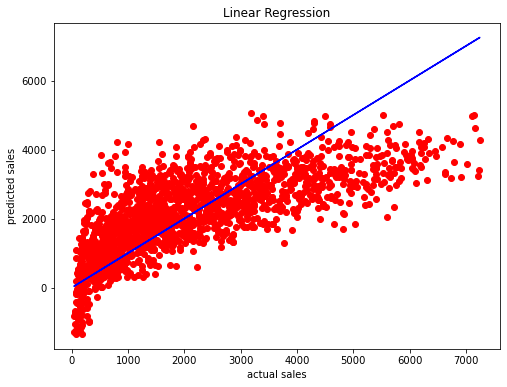

In [57]:
plt.figure(figsize=[8,6])
plt.scatter(x=y_test,y=pred_test,color='red')
plt.plot(y_test,y_test,color='b')
plt.xlabel('actual sales')
plt.ylabel('predicted sales')
plt.title('Linear Regression')
plt.show()

Regualrisation

In [58]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
parameters= {'alpha':[.0001,.001,.01,.1,1,10],'random_state':list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'alpha': 0.001, 'random_state': 0}


In [59]:
# Model Training

ls=Lasso(alpha=0.1,random_state=0)
ls.fit(x_train,y_train)
ls_score_training=ls.score(x_train,y_train)
pred_ls=ls.predict(x_test)
ls_score_training*100

51.51588462097778

In [60]:
lss=r2_score(y_test,pred_ls)
lss*100

51.596354346026764

In [61]:
cv_score=cross_val_score(ls,x,y,cv=5)
cv_mean=cv_score.mean()
cv_mean*100

51.382655825108046

Ensemble technique

In [ ]:
from sklearn.ensemble import RandomForestRegressor
parametres={'criterion':['mse','mae'],'max_features':['auto','sqrt','log2']}
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parametres)
clf.fit(x_train,y_train)
print(clf.best_params_)